### Example: Fit the van der Waals equation of state to Methane data 

In [2]:
# includes -
include("./src/Include.jl");

In [19]:
# setup the problem -
path_to_data_file = "./Methane-NIST-210K.txt";
path_to_properties_file = "./Properties.toml";

In [20]:
# What is the data?
df = load_data_table(path_to_data_file)

,Temperature (K),Pressure (MPa),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol)
,Float64,Float64,Float64,Float64,Float64
1,210.0,0.01,0.0057303,174.51,9.8283
2,210.0,0.048317,0.027745,36.043,9.821
3,210.0,0.086633,0.049852,20.059,9.8136
4,210.0,0.12495,0.072053,13.879,9.8062
5,210.0,0.16327,0.094348,10.599,9.7988
6,210.0,0.20158,0.11674,8.5662,9.7914
7,210.0,0.2399,0.13923,7.1826,9.7839
8,210.0,0.27822,0.16181,6.1801,9.7764
9,210.0,0.31653,0.18449,5.4203,9.7688


In [26]:
# fit model parameters -
pV = fit_model(path_to_data_file, path_to_properties_file)

2-element Array{Float64,1}:
 0.18188620111580509
 0.03286012707941142

In [22]:
# Sanity check - what are the parameters if we use the critical point?
pd = load_material_properties(path_to_properties_file)["methane"]
working_fluid_model = buildSingleComponentWorkingFluid(pd)
vdwEOS = buildVanDerWaalsEquationOfState(working_fluid_model)
pV_ip = [vdwEOS.a ; vdwEOS.b]

2-element Array{Float64,1}:
 0.230428514993304
 0.04309664581066377

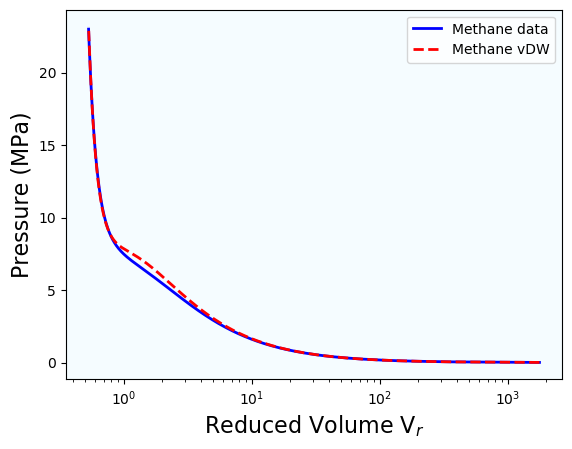

In [27]:
# plot the fit model -
Vc = pd["critical_volume"]

# setup the problem -
working_fluid_model = buildSingleComponentWorkingFluid(pd)
vdwEOS = buildVanDerWaalsEquationOfState(working_fluid_model)
vdwEOS.a = pV[1]
vdwEOS.b = pV[2]

# setup the data -
# get the PVT data -
PcolName = Symbol("Pressure (MPa)")
VcolName = Symbol("Volume (l/mol)")
TcolName = Symbol("Temperature (K)")
P_data_array = df[!,PcolName]
V_data_array = df[!,VcolName]
T_data_array = df[!,TcolName]

# compute the model pressure array -
P_model_array = evaluate_model_pressure(vdwEOS, df)

# plot -
semilogx(V_data_array*(1/Vc),P_data_array,"b",lw=2,label="Methane data")
semilogx(V_data_array*(1/Vc),P_model_array,"r--",lw=2, label="Methane vDW")
xlabel(L"Reduced Volume V$_{r}$", fontsize=16)
ylabel("Pressure (MPa)", fontsize=16)
legend(loc="upper right")
fig = gcf()
ax = gca()
ax.set_facecolor("#F5FCFF")
fig.set_facecolor("#F5FCFF")

In [11]:
# lets try to predict T now that I have the paramerers -
# compute the model pressure array -
T_model_array = evaluate_model_temperature(vdwEOS, df)

602-element Array{Float64,1}:
 151.935612946865
 151.87259210581374
 151.80278582144018
 151.7334035960613
 151.66564235887324
 151.5959169547521
 151.52900793728577
 151.4601435042542
 151.38576527905718
 151.32134232469676
 151.25378768156702
 151.17956122652603
 151.10756836591682
   ⋮
 151.9847119720228
 151.98714032656994
 151.98956133185288
 151.9859146720549
 151.98831850451765
 151.98464908983928
 151.98703574597982
 151.98334357116644
 151.98571304748037
 151.9880751697658
 151.9843504002547
 151.98669533780387

Description of the approach: https://en.wikipedia.org/wiki/Broyden–Fletcher–Goldfarb–Shanno_algorithm

In [29]:
# pathology -
# ok, lets sample the volume -
T_sat = 152.0
P_sat = 1.1372 # MPa
V = volume(vdwEOS,P_sat,T_sat; V=0.06)

0.049885583173370454